In [1]:
import pandas as pd

train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")
sub=pd.read_csv("../input/sample_submission.csv")
dipole=pd.read_csv("../input/dipole_moments.csv")
magnetic_shield=pd.read_csv("../input/magnetic_shielding_tensors.csv")
scalar_coupling=pd.read_csv("../input/scalar_coupling_contributions.csv")
mulliken=pd.read_csv("../input/mulliken_charges.csv")
potential_energy=pd.read_csv("../input/potential_energy.csv")
structure=pd.read_csv("../input/structures.csv")


In [19]:
print(f'train row:{train.shape[0]}')
print(f"test row: {test.shape[0]}")
print(f"mocelcues in train: {len(train['molecule_name'].unique())}")
print(f"mocelcues in test: {len(test['molecule_name'].unique())}")
print(f"atom in structrue:{len(structure['atom'].unique())}")
print(f"type in train:{len(train['type'].unique())}")

train row:4658147
test row: 2505542
mocelcues in train: 85003
mocelcues in test: 45772
atom in structrue:5
type in train:8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe19ba4a1d0>,
      dtype=object)

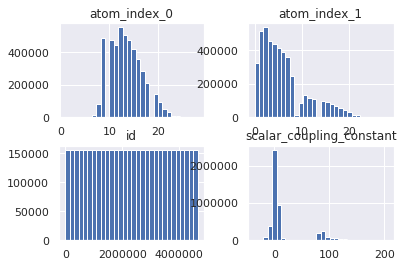

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
train[train['atom_index_0']!=0].hist(bins=30)


In [57]:
train[train['atom_index_0']==14].shape


(476556, 6)